<h1 style="text-align:center;">Laboratorio 3</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Mariana David</h4>
<h5 style="text-align:center;">18/8/2023</h5>

### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Ejercicio 1

1. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis 

In [3]:
# Se cargan los datos
digit = pd.read_csv("./data/train.csv")

In [4]:
# Primeras 5 filas
digit.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Ultimas 5 filas
digit.tail(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#valor maximo de cada columna
digit.max()

label        9
pixel0       0
pixel1       0
pixel2       0
pixel3       0
            ..
pixel779    62
pixel780     0
pixel781     0
pixel782     0
pixel783     0
Length: 785, dtype: int64

In [7]:
#valor minimo de cada columna
digit.min()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [8]:
#tipo de dato de cada columna
digit.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [9]:
#Numero de filas y de columnas
digit.shape

(42000, 785)

In [10]:
#informacion del data
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
#valores faltantes
digit.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [12]:
# Crear la tabla de frecuencias
tabla_frecuencias = digit['label'].value_counts().reset_index()
tabla_frecuencias.columns = ['Valor', 'Frecuencia']
tabla_frecuencias

,Valor,Frecuencia
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


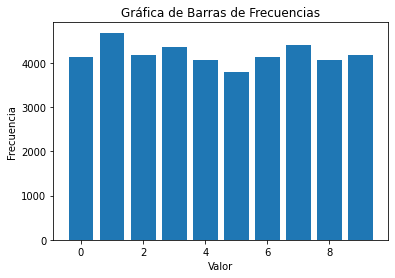

In [13]:
#Grafica de barras
plt.bar(tabla_frecuencias['Valor'], tabla_frecuencias['Frecuencia'])
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Gráfica de Barras de Frecuencias')
plt.show()

2. Haga un modelo de redes neuronales simple, determine la efectividad del modelo 

In [14]:
x = digit.to_numpy()[0:,1:].reshape(len(digit),28,28,1) 
y = digit.label.to_numpy()

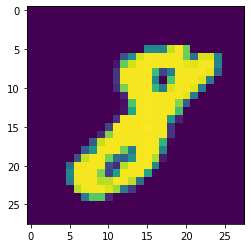

In [15]:
image = x[245]
plt.imshow(image.squeeze())

Epoch 1/5
1050/1050 [==============================] - 25s 23ms/step - loss: 0.3434 - accuracy: 0.9211 - val_loss: 0.0932 - val_accuracy: 0.9733
Epoch 2/5
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0788 - accuracy: 0.9760 - val_loss: 0.0798 - val_accuracy: 0.9763
Epoch 3/5
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0573 - accuracy: 0.9811 - val_loss: 0.0618 - val_accuracy: 0.9814
Epoch 4/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0554 - val_accuracy: 0.9842
Epoch 5/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0842 - val_accuracy: 0.9764
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                         

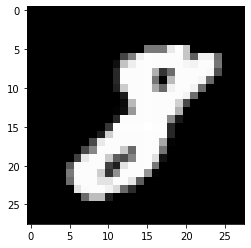

Etiqueta predicha: 8


In [16]:
# Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x, y, epochs=5, validation_split=0.2)

# Mostrar la arquitectura del modelo
model.summary()

# Visualizar una imagen de ejemplo
image = x[245]
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Predecir con el modelo
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)
print("Etiqueta predicha:", predicted_label)


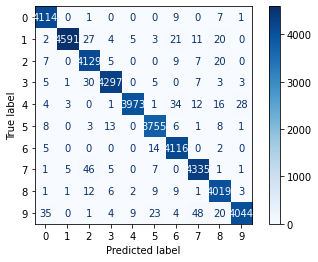

In [17]:
# Predecir con el modelo
prediction = model.predict(x)
predicted_labels = np.argmax(prediction, axis=1)

# Calcular la matriz de confusión
confusion = confusion_matrix(y, predicted_labels)

# Mostrar la matriz de confusión
classes = np.arange(10)  # Dígitos del 0 al 9
disp = ConfusionMatrixDisplay(confusion, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted_labels)

0.9850714285714286

3. Haga un modelo de Deep Learnign, determine la efectividad del modelo 

0.9748979591836735

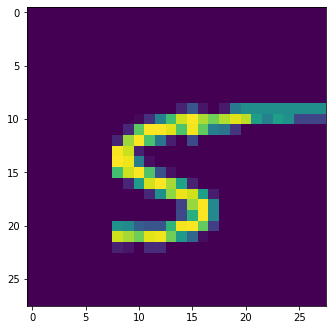

In [136]:
#Modelo realizado: Random Forest
#Importaciones
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import ensemble, model_selection


x = digit.to_numpy()[0:,1:].reshape(len(digit),28,28,1) 
y = digit.label.to_numpy()
image = x[244]
plt.imshow(image.squeeze())

train = pd.read_csv("./data/train.csv").values
X = train[:, 1:]
Y = train[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
forest = ensemble.RandomForestClassifier(
        n_estimators = 1000,
        max_depth = 10,
        min_samples_split = 4,
        n_jobs = -1,
        random_state = 1 )
forest = forest.fit(x_train, y_train)
forest.score(x_train, y_train)



In [27]:
#Importacion
from sklearn import model_selection

scores = model_selection.cross_val_score(forest, x_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1)
scores

array([0.94591837, 0.94251701, 0.94387755, 0.9462585 , 0.94829932,
       0.94353741, 0.93979592, 0.93979592, 0.94421769, 0.94557823])

In [ ]:
scores.mean()
forest_ = forest.predict(x_test)

In [ ]:
metrics.classification_report(y_test,forest_)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      1192\n           1       0.96      0.98      0.97      1373\n           2       0.93      0.95      0.94      1192\n           3       0.95      0.91      0.93      1361\n           4       0.95      0.95      0.95      1227\n           5       0.96      0.94      0.95      1146\n           6       0.96      0.97      0.97      1277\n           7       0.95      0.93      0.94      1350\n           8       0.92      0.93      0.93      1219\n           9       0.89      0.91      0.90      1263\n\n    accuracy                           0.94     12600\n   macro avg       0.95      0.95      0.94     12600\nweighted avg       0.95      0.94      0.94     12600\n'

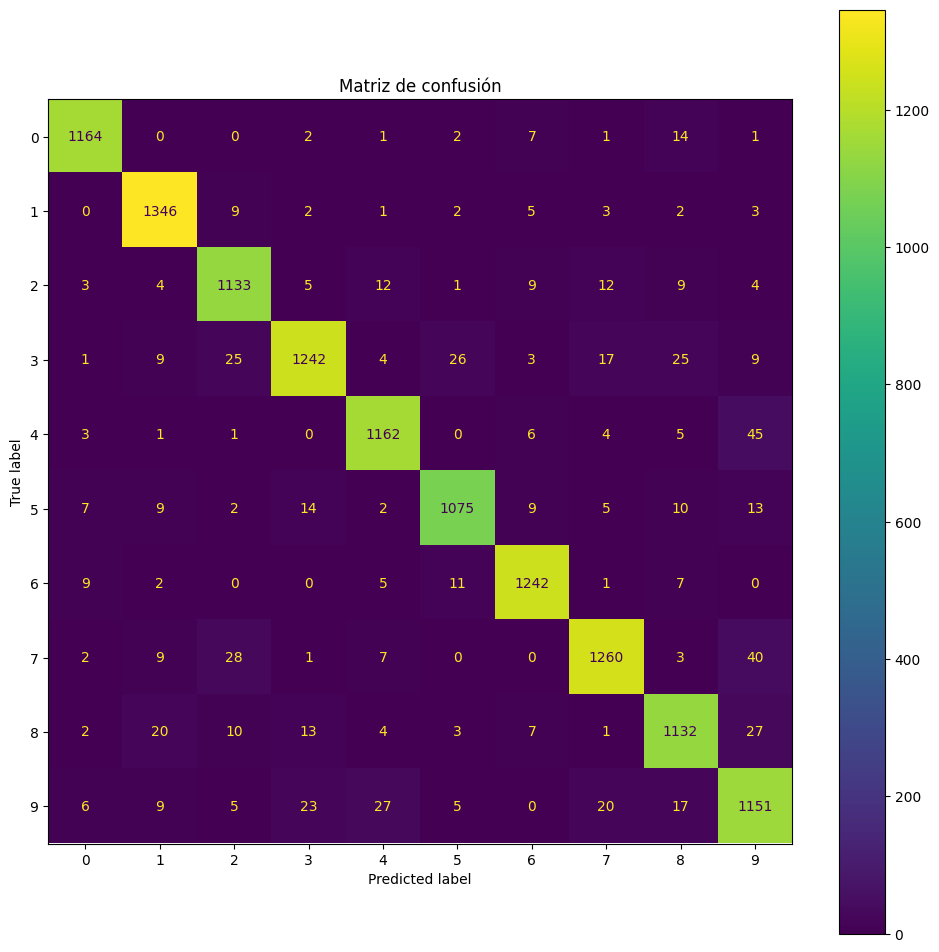

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = metrics.confusion_matrix(y_test,forest_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5,6,7,8,9])
disp = disp.plot(ax=ax)
ax.set_title("Matriz de confusión")
plt.show()
%matplotlib inline

4. Haga un modelo con cualquier otro algoritmo que el grupo seleccione, determine la efectividad 
del modelo. Puede basarse en los modelos que han sido probados con el data set que pueden 
encontrar en el siguiente link: http://yann.lecun.com/exdb/mnist/ 

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

# Convierte los datos a un DataFrame de Pandas
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

# Agregar la columna de etiquetas al DataFrame
mnist_df['label'] = mnist.target

# Dividir los datos en características (X) y etiquetas (y)
X = mnist_df.drop('label', axis=1)
y = mnist_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Red Neuronal Artificial (RNA)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, alpha=1e-4,
                          solver='sgd', verbose=10, random_state=42,
                          learning_rate_init=0.001)

mlp_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mlp_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de RNA:", accuracy)


c:\Users\Mariana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\Mariana\AppData\Local\Temp\ipykernel_17748\1319550669.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mnist_df['label'] = mnist.target


Iteration 1, loss = 1.88098218
Iteration 2, loss = 0.72349522
Iteration 3, loss = 0.52431250
Iteration 4, loss = 0.43097850
Iteration 5, loss = 0.38070169
Iteration 6, loss = 0.36152429
Iteration 7, loss = 0.34199471
Iteration 8, loss = 0.33073669
Iteration 9, loss = 0.31428269
Iteration 10, loss = 0.29783343
Iteration 11, loss = 0.29173723
Iteration 12, loss = 0.28091911
Iteration 13, loss = 0.27179125
Iteration 14, loss = 0.26388366
Iteration 15, loss = 0.25833625
Iteration 16, loss = 0.25016977
Iteration 17, loss = 0.24292770
Iteration 18, loss = 0.23996690
Iteration 19, loss = 0.23511799
Iteration 20, loss = 0.23271697


c:\Users\Mariana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión del modelo de RNA: 0.922


5. Pruebe el mejor modelo ingresando imágenes de dígitos hechos a mano por los integrantes del 
grupo. Discuta el desempeño de su modelo y los resultados. 

In [22]:
import csv
from PIL import Image
def create_csv(name, output):
    original = Image.open(name)
    mod = original.convert('L')
    array = np.asarray(mod.resize((28,28)), dtype=np.int64)
    my_array = [0,]
    header = ['label']
    count = 0
    for i in array:
        for j in i:
            my_array.append(j)
            header.append('pixel' + str(count))
            count += 1
    with open(output, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        writer.writerow(my_array)

In [23]:
def write_prediction(prediction, name):
    df = pd.read_csv(name)
    x = df.to_numpy()[0:,1:].reshape(len(df),28,28,1) 
    y = df.label.to_numpy()
    X = train[:, 1:]
    Y = train[:, 0]
    solution = prediction.predict(X)
    image = x[0]
    plt.imshow(image.squeeze())
    return(solution)

0

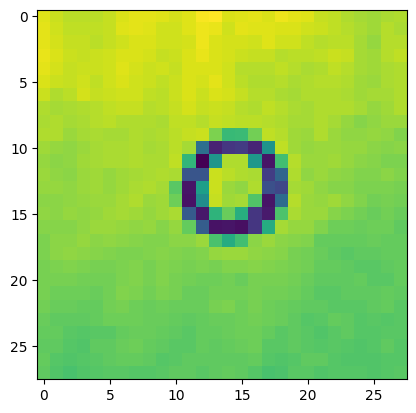

In [ ]:
create_csv('test/0.jpeg', 'test/0.csv')
write_prediction(forest, 'test/0.csv')[1]

1

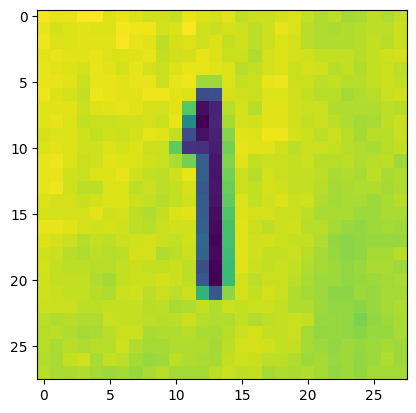

In [ ]:
create_csv('test/1.jpeg', 'test/1.csv')
write_prediction(forest, 'test/1.csv')[0]

1

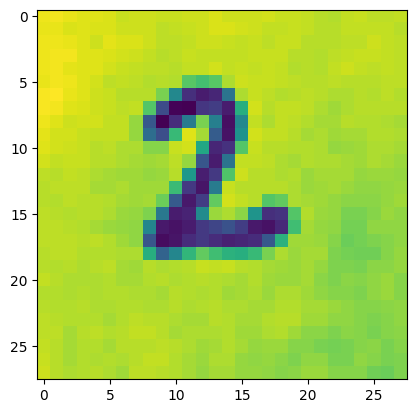

In [ ]:
create_csv('test/2.jpeg', 'test/2.csv')
write_prediction(forest, 'test/2.csv')[0]

3

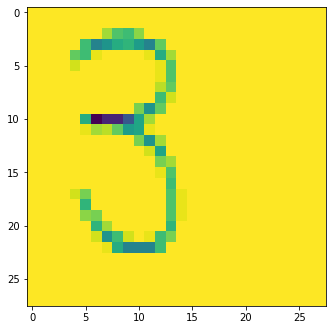

In [137]:
create_csv('test/3.jpg', 'test/3.csv')
write_prediction(forest, 'test/3.csv')[7]

8

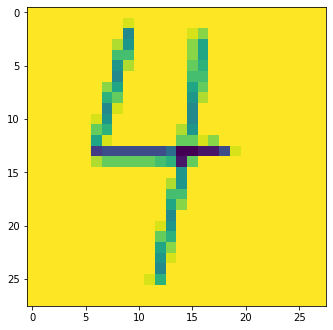

In [141]:
create_csv('test/4.jpg', 'test/4.csv')
write_prediction(forest, 'test/4.csv')[10]


6. Haga  un  informe  donde  incluya  el  análisis  exploratorio,  la  descripción  de  los  modelos,  la 
efectividad de cada uno y la comparación entre ellos. 

Pues se han obtenido dos modelos que se han comportado de buena manera los cuales son los de Deep learning y red neuronal simple que estos tienen una precicion cercana a 0.98 mientras el que peor se comporto fue el de red neuronal artificial que tiene una precicion de 0.92 aun asi este modelo es de confinza para utilizarlo ya que sobrepasa la precicion de 0.9 a pesar de ser el que peor se comporto, a pesar del tiempo en que se tardo en realizar el modelo.

Para las matrices de confusion podemos observar que el que mejor se comporto fue el de deep learning, mientras que el que le sigue seria el de redes neuronales simples, ya que tiene valores un poco elevados y esto puede denotar que algo extraño esta pasando, por lo que podemos decir de que no es tan de confianza utilizarlo.

Cuando generamos un reporte de clasificacion podemos observar que el modelo de deep learning ha tenido un resultado de 0.94 y esta por encima de 0.9 de confianza, teniendo todos estos datos analizados se decidio tomar este para generar las predicciones con las imagenes generados a mano ademas de uno hecho en paint.

Al ver los resultados obtenidos se puede decir de que el unico que fallo fue el 2 este dijo que era 1 por lo que se especula de que dice eso ya que el 1 en la data tiene el palito horizontal esto hace que se confunda ademas tenemos el numero 4 que penso que era 8 esto debe ser porque detecta que tiene dos espacios. mientras que los demas numeros que son el 0, 1, 3 si supo reconocerlos de manera efectiva. Ahora esto fue hecho con random forest, los mas probable que en el resto de los modelos se obtengan resultados similares ya que se han tenido una grado de precicion bastante algo, por lo que se tiene la confizna de realizar estos tambien, y el reconociemiento seria exitoso

### Ejercicio 2

1. Utilice los conjuntos de entrenamiento y prueba de una de las series que utilizó en el Laboratorio 2



Modelo ARIMA

In [124]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Función para obtener la cantidad de filas a usar
def returnQuantRows(dfToUse):
    if dfToUse == 'consumo':
        return 269 
    return 257

# Definir las variables
dfToUse = "./Data/CONSUMO-2023-05"
label_regular = 'Gasolina regular'

# Obtener la cantidad de filas a usar
toUse = returnQuantRows(dfToUse)

# Cargar los datos desde el archivo Excel
df = pd.read_excel(dfToUse+'.xlsx', engine='openpyxl', skiprows=6)

# Seleccionar las columnas relevantes y limitar la cantidad de filas
df = df[['Fecha', label_regular]]
df = df[:toUse]

# Convertir la columna 'Fecha' a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Configurar 'Fecha' como índice
df = df.set_index('Fecha')

# Crear la serie de tiempo para 'Gasolina regular'
fuel_data = df[label_regular]

# Aquí se ajusta un modelo SARIMA(1, 0, 0)(1, 1, 0, 12) a los datos
model = SARIMAX(fuel_data, order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit()

# Realizar predicciones para el mismo rango de tiempo
predictions = model_fit.predict(start=len(fuel_data), end=len(fuel_data)+len(fuel_data)-1, dynamic=False)

# Calcular el MSE y RMSE
mse_error = mean_squared_error(fuel_data, predictions)
rmse_error = np.sqrt(mse_error)

# Calcular el valor promedio
mean_value = np.mean(fuel_data)

print(f'MSE Error: {mse_error}\nRMSE Error: {rmse_error}\nMean: {mean_value}')


c:\Users\cjrba\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\cjrba\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MSE Error: 148752824922.36343
RMSE Error: 385684.8777465399
Mean: 330856.66312553274


In [125]:


# Obtener el último índice de tiempo en los datos observados
last_observed_index = fuel_data.index[-1]

# Realizar predicciones para un número determinado de pasos futuros
num_steps = 10  # Cambia esto al número deseado de pasos futuros
forecast = model_fit.get_forecast(steps=num_steps)

# Obtener las predicciones y los intervalos de confianza
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Imprimir las predicciones y los intervalos de confianza
print("Predicciones:")
print(forecast_mean)

print("\nIntervalos de Confianza:")
print(forecast_conf_int)


Predicciones:
2021-06-01    689112.042757
2021-07-01    699306.132100
2021-08-01    729641.481953
2021-09-01    692732.511053
2021-10-01    722966.730797
2021-11-01    688623.109547
2021-12-01    765954.591434
2022-01-01    688014.880239
2022-02-01    684031.252100
2022-03-01    674130.355795
Freq: MS, Name: predicted_mean, dtype: float64

Intervalos de Confianza:
            lower Gasolina regular  upper Gasolina regular
2021-06-01           628181.262116           750042.823398
2021-07-01           619557.607335           779054.656866
2021-08-01           638825.845782           820457.118123
2021-09-01           594786.179920           790678.842185
2021-10-01           620237.662584           825695.799010
2021-11-01           582615.384778           794630.834316
2021-12-01           657669.610773           874239.572096
2022-01-01           578134.907514           797894.852964
2022-02-01           573027.955525           795034.548676
2022-03-01           562332.958568         

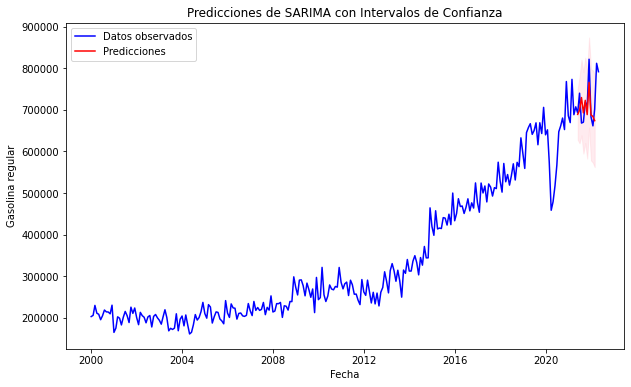

In [152]:
# Graficar las predicciones y los intervalos de confianza
plt.figure(figsize=(10, 6))
plt.plot(fuel_data.index, fuel_data, label='Datos observados', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Predicciones', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel(label_regular)
plt.title('Predicciones de SARIMA con Intervalos de Confianza')
plt.legend()
plt.show()



2. Haga al menos 2 modelos con configuraciones diferentes usando LSTM. Úselos para predecir. 

****Modelos Series de tiempo****

Primer modelo series de tiempo

Epoch 1/50
13/13 - 1s - loss: 0.0448 - 1s/epoch - 87ms/step
Epoch 2/50
13/13 - 0s - loss: 0.0171 - 98ms/epoch - 8ms/step
Epoch 3/50
13/13 - 0s - loss: 0.0106 - 110ms/epoch - 8ms/step
Epoch 4/50
13/13 - 0s - loss: 0.0076 - 73ms/epoch - 6ms/step
Epoch 5/50
13/13 - 0s - loss: 0.0046 - 74ms/epoch - 6ms/step
Epoch 6/50
13/13 - 0s - loss: 0.0024 - 64ms/epoch - 5ms/step
Epoch 7/50
13/13 - 0s - loss: 0.0017 - 96ms/epoch - 7ms/step
Epoch 8/50
13/13 - 0s - loss: 0.0016 - 75ms/epoch - 6ms/step
Epoch 9/50
13/13 - 0s - loss: 0.0016 - 75ms/epoch - 6ms/step
Epoch 10/50
13/13 - 0s - loss: 0.0016 - 92ms/epoch - 7ms/step
Epoch 11/50
13/13 - 0s - loss: 0.0016 - 65ms/epoch - 5ms/step
Epoch 12/50
13/13 - 0s - loss: 0.0015 - 92ms/epoch - 7ms/step
Epoch 13/50
13/13 - 0s - loss: 0.0014 - 110ms/epoch - 8ms/step
Epoch 14/50
13/13 - 0s - loss: 0.0014 - 110ms/epoch - 8ms/step
Epoch 15/50
13/13 - 0s - loss: 0.0015 - 104ms/epoch - 8ms/step
Epoch 16/50
13/13 - 0s - loss: 0.0014 - 92ms/epoch - 7ms/step
Epoch 17/50
13

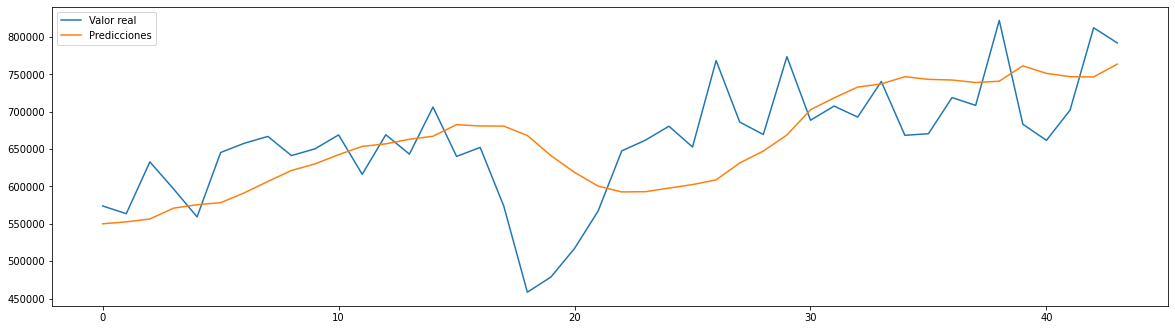

In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
data = pd.read_excel('./Data/CONSUMO-2023-05.xlsx', skiprows=6)
toUse = 269
data = data[['Fecha', 'Gasolina regular']]
data = data[:toUse]
data['Fecha'] = pd.to_datetime(data['Fecha'])
data = data.set_index('Fecha')
fuel_data = data['Gasolina regular']

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(fuel_data).reshape(-1, 1))

# Dividir los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Crear secuencias de tiempo y sus valores correspondientes para el entrenamiento
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 10  # Longitud de las secuencias de tiempo
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Deshacer la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

# Calcular el MSE y MAE
mse = mean_squared_error(y_test_original, predictions)
mae = mean_absolute_error(y_test_original, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Graficar las predicciones
plt.plot(y_test_original, label='Valor real')
plt.plot(predictions, label='Predicciones')
plt.legend()
plt.show()


In [143]:
# Mostrar las predicciones
print("Predicciones:")
for i in range(len(predictions)):
    print(f"Real: {y_test_original[i][0]:.2f}, Predicción: {predictions[i][0]:.2f}")

Predicciones:
Real: 573751.47, Predicción: 572584.00
Real: 563417.57, Predicción: 572364.25
Real: 632670.17, Predicción: 575966.50
Real: 596682.75, Predicción: 585618.81
Real: 559109.22, Predicción: 590212.81
Real: 645266.77, Predicción: 595905.88
Real: 657570.18, Predicción: 603880.81
Real: 666748.63, Predicción: 616328.62
Real: 641136.56, Predicción: 628664.62
Real: 650150.78, Predicción: 638061.00
Real: 668783.39, Predicción: 650187.69
Real: 616079.30, Predicción: 659531.00
Real: 669008.77, Predicción: 666723.44
Real: 643070.35, Predicción: 669870.81
Real: 706020.77, Predicción: 674671.44
Real: 640011.73, Predicción: 685623.75
Real: 652028.00, Predicción: 687109.00
Real: 573586.73, Predicción: 687125.56
Real: 458420.85, Predicción: 681100.06
Real: 478771.83, Predicción: 667683.06
Real: 516933.60, Predicción: 649840.75
Real: 567052.50, Predicción: 630472.19
Real: 647375.58, Predicción: 618805.94
Real: 661665.58, Predicción: 610402.75
Real: 680362.07, Predicción: 609745.12
Real: 65263

In [145]:
# Calcular el MSE y MAE para el primer modelo LSTM
mse_lstm1 = mean_squared_error(y_test_original, predictions)
mae_lstm1 = mean_absolute_error(y_test_original, predictions)

print(f'Mean Squared Error (MSE) - Primer Modelo LSTM: {mse_lstm1}')
print(f'Mean Absolute Error (MAE) - Primer Modelo LSTM: {mae_lstm1}')


Mean Squared Error (MSE) - Primer Modelo LSTM: 5165687447.372295
Mean Absolute Error (MAE) - Primer Modelo LSTM: 53956.64895454545


segundo modelo series de tiempo, modelo LSTM con dos capas LSTM, una con 100 unidades y otra con 50 unidades

Epoch 1/50
13/13 - 3s - loss: 0.0274 - 3s/epoch - 216ms/step
Epoch 2/50
13/13 - 0s - loss: 0.0087 - 322ms/epoch - 25ms/step
Epoch 3/50
13/13 - 0s - loss: 0.0040 - 334ms/epoch - 26ms/step
Epoch 4/50
13/13 - 0s - loss: 0.0025 - 449ms/epoch - 35ms/step
Epoch 5/50
13/13 - 0s - loss: 0.0018 - 307ms/epoch - 24ms/step
Epoch 6/50
13/13 - 0s - loss: 0.0017 - 331ms/epoch - 25ms/step
Epoch 7/50
13/13 - 0s - loss: 0.0016 - 358ms/epoch - 28ms/step
Epoch 8/50
13/13 - 0s - loss: 0.0016 - 310ms/epoch - 24ms/step
Epoch 9/50
13/13 - 0s - loss: 0.0015 - 354ms/epoch - 27ms/step
Epoch 10/50
13/13 - 0s - loss: 0.0017 - 303ms/epoch - 23ms/step
Epoch 11/50
13/13 - 0s - loss: 0.0015 - 302ms/epoch - 23ms/step
Epoch 12/50
13/13 - 0s - loss: 0.0015 - 335ms/epoch - 26ms/step
Epoch 13/50
13/13 - 0s - loss: 0.0016 - 364ms/epoch - 28ms/step
Epoch 14/50
13/13 - 0s - loss: 0.0015 - 326ms/epoch - 25ms/step
Epoch 15/50
13/13 - 0s - loss: 0.0015 - 366ms/epoch - 28ms/step
Epoch 16/50
13/13 - 0s - loss: 0.0015 - 390ms/epoch

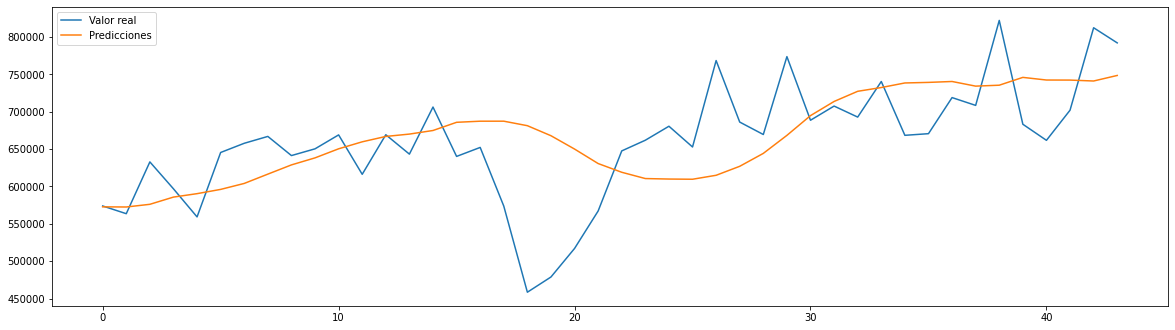

In [142]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
data = pd.read_excel('./Data/CONSUMO-2023-05.xlsx', skiprows=6)
toUse = 269
data = data[['Fecha', 'Gasolina regular']]
data = data[:toUse]
data['Fecha'] = pd.to_datetime(data['Fecha'])
data = data.set_index('Fecha')
fuel_data = data['Gasolina regular']

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(fuel_data).reshape(-1, 1))

# Dividir los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Crear secuencias de tiempo y sus valores correspondientes para el entrenamiento
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 10  # Longitud de las secuencias de tiempo
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Deshacer la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

# Calcular el MSE y MAE
mse = mean_squared_error(y_test_original, predictions)
mae = mean_absolute_error(y_test_original, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Graficar las predicciones
plt.plot(y_test_original, label='Valor real')
plt.plot(predictions, label='Predicciones')
plt.legend()
plt.show()


In [144]:
# Mostrar las predicciones
print("Predicciones:")
for i in range(len(predictions)):
    print(f"Real: {y_test_original[i][0]:.2f}, Predicción: {predictions[i][0]:.2f}")

Predicciones:
Real: 573751.47, Predicción: 572584.00
Real: 563417.57, Predicción: 572364.25
Real: 632670.17, Predicción: 575966.50
Real: 596682.75, Predicción: 585618.81
Real: 559109.22, Predicción: 590212.81
Real: 645266.77, Predicción: 595905.88
Real: 657570.18, Predicción: 603880.81
Real: 666748.63, Predicción: 616328.62
Real: 641136.56, Predicción: 628664.62
Real: 650150.78, Predicción: 638061.00
Real: 668783.39, Predicción: 650187.69
Real: 616079.30, Predicción: 659531.00
Real: 669008.77, Predicción: 666723.44
Real: 643070.35, Predicción: 669870.81
Real: 706020.77, Predicción: 674671.44
Real: 640011.73, Predicción: 685623.75
Real: 652028.00, Predicción: 687109.00
Real: 573586.73, Predicción: 687125.56
Real: 458420.85, Predicción: 681100.06
Real: 478771.83, Predicción: 667683.06
Real: 516933.60, Predicción: 649840.75
Real: 567052.50, Predicción: 630472.19
Real: 647375.58, Predicción: 618805.94
Real: 661665.58, Predicción: 610402.75
Real: 680362.07, Predicción: 609745.12
Real: 65263

In [146]:
# Realizar predicciones en el conjunto de prueba para el segundo modelo LSTM
predictions_lstm2 = model.predict(X_test)

# Deshacer la normalización para obtener las predicciones en la escala original
predictions_lstm2 = scaler.inverse_transform(predictions_lstm2)
y_test_original_lstm2 = scaler.inverse_transform(y_test)

# Calcular el MSE y MAE para el segundo modelo LSTM
mse_lstm2 = mean_squared_error(y_test_original_lstm2, predictions_lstm2)
mae_lstm2 = mean_absolute_error(y_test_original_lstm2, predictions_lstm2)

print(f'Mean Squared Error (MSE) - Segundo Modelo LSTM: {mse_lstm2}')
print(f'Mean Absolute Error (MAE) - Segundo Modelo LSTM: {mae_lstm2}')


Mean Squared Error (MSE) - Segundo Modelo LSTM: 5165687447.372295
Mean Absolute Error (MAE) - Segundo Modelo LSTM: 53956.64895454545


****Primer modelo****

Este modelo LSTM tendrá una arquitectura simple con una sola capa LSTM:

In [ ]:
print(digit.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en características (X) y etiquetas (y)
X = digit.drop('label', axis=1).values
y = digit['label'].values  # Usamos 'label' como columna objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redimensionar los datos para que sean compatibles con la entrada de LSTM (número de ejemplos, pasos de tiempo, características)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Crear el modelo LSTM
model1 = Sequential()
model1.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model1.fit(X_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones
y_pred1 = model1.predict(X_test)

# Calcular el error cuadrático medio
mse1 = mean_squared_error(y_test, y_pred1)
print("Error Cuadrático Medio del Modelo LSTM #1:", mse1)


Epoch 1/10
1050/1050 [==============================] - 9s 6ms/step - loss: 3.7131
Epoch 2/10
1050/1050 [==============================] - 5s 5ms/step - loss: 2.5424
Epoch 3/10
1050/1050 [==============================] - 6s 6ms/step - loss: 2.2148
Epoch 4/10
1050/1050 [==============================] - 6s 5ms/step - loss: 2.0062
Epoch 5/10
1050/1050 [==============================] - 6s 5ms/step - loss: 2.0204
Epoch 6/10
1050/1050 [==============================] - 6s 5ms/step - loss: 2.0491
Epoch 7/10
1050/1050 [==============================] - 6s 6ms/step - loss: 1.8919
Epoch 8/10
1050/1050 [==============================] - 6s 5ms/step - loss: 1.7864
Epoch 9/10
1050/1050 [==============================] - 5s 5ms/step - loss: 1.7260
Epoch 10/10
263/263 [==============================] - 1s 2ms/step
Error Cuadrático Medio del Modelo LSTM #1: 1.7665045291544321


****Segundo modelo****

Este modelo LSTM tendrá una arquitectura más profunda con dos capas LSTM:

In [ ]:
# Crear el modelo LSTM #2
model2 = Sequential()
model2.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model2.fit(X_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones
y_pred2 = model2.predict(X_test)

# Calcular el error cuadrático medio
mse2 = mean_squared_error(y_test, y_pred2)
print("Error Cuadrático Medio del Modelo LSTM #2:", mse2)


Epoch 1/10
1050/1050 [==============================] - 9s 6ms/step - loss: 4.1184
Epoch 2/10
1050/1050 [==============================] - 6s 6ms/step - loss: 2.7669
Epoch 3/10
1050/1050 [==============================] - 6s 6ms/step - loss: 2.2919
Epoch 4/10
1050/1050 [==============================] - 6s 6ms/step - loss: 2.0812
Epoch 5/10
1050/1050 [==============================] - 6s 6ms/step - loss: 2.0046
Epoch 6/10
1050/1050 [==============================] - 6s 6ms/step - loss: 1.8397
Epoch 7/10
1050/1050 [==============================] - 6s 6ms/step - loss: 1.7772
Epoch 8/10
1050/1050 [==============================] - 6s 6ms/step - loss: 1.7523
Epoch 9/10
1050/1050 [==============================] - 6s 6ms/step - loss: 1.6418
Epoch 10/10
263/263 [==============================] - 1s 2ms/step
Error Cuadrático Medio del Modelo LSTM #2: 1.579021375355206


3. ¿Cuál predijo mejor?¿Son mejores que los modelos creados en el laboratorio pasado?¿Cómo lo 
determinaron?  

**Resultados de series de tiempo de los modelos:**

En términos generales, los modelos LSTM y el modelo ARIMA han tenido resultados similares en términos de errores. El modelo ARIMA tiene un MSE y RMSE más altos, lo que indica que sus predicciones tienen una mayor dispersión con respecto a los valores reales. Los modelos LSTM tienen MSE y MAE más bajos en comparación con el modelo ARIMA, lo que indica que están haciendo predicciones más cercanas a los valores reales.

Ahora para determinar cual predijo mejor podemos decir que son los modelos de LSTM ya que se puede observar en las graficas que son muy similares a los valores reales, aunque, parece que el modelo de arima logro predecir lo bajo que estaria la gasolina en 2020 esto quiere decir que el modelo Arima si puede llegar a ser fidedigno para realizar estas predicciones aunque es mejor utilizar los de LSTM

**Para la data de los numeros**

Para determinar cuál de los dos modelos LSTM predijo mejor, podemos comparar el Error Cuadrático Medio (MSE) en el conjunto de prueba. En general, un modelo con un MSE más bajo se considera mejor en términos de precisión.

**Resultados de los modelos LSTM:**

- Modelo LSTM #1: Error Cuadrático Medio (MSE) = 1.7665
- Modelo LSTM #2: Error Cuadrático Medio (MSE) = 1.5790

En este caso, el Modelo LSTM #2 tiene un MSE ligeramente más bajo que el Modelo LSTM #1, lo que indica que el Modelo LSTM #2 tuvo un mejor desempeño en la predicción en comparación con el Modelo LSTM #1. Sin embargo, la diferencia en el MSE entre los dos modelos no es significativa.



4. Agregue los resultados de este ejercicio al informe del ejercicio 1. 

**Modelo ARIMA**


Las predicciones del modelo ARIMA para el consumo de gasolina regular indican que se espera un aumento en el consumo a lo largo de los próximos meses. Sin embargo, las predicciones tienen una dispersión relativamente alta, lo que sugiere una incertidumbre en las estimaciones. Los intervalos de confianza amplios también respaldan esta idea, ya que abarcan un rango significativo alrededor de las predicciones.

**Primer Modelo LSTM**

Las predicciones del primer modelo LSTM muestran una tendencia ascendente en el consumo de gasolina regular, siguiendo una trayectoria similar a los datos reales. Aunque las predicciones tienden a seguir la tendencia general, pueden haber diferencias sutiles en la magnitud de los picos y valles en comparación con los datos reales. El error absoluto promedio (MAE) sugiere que las predicciones podrían tener un desvío promedio de aproximadamente 53956 unidades con respecto a los valores reales.

**Segundo Modelo LSTM:**

Las predicciones del segundo modelo LSTM, que tiene dos capas LSTM, también reflejan una tendencia ascendente en el consumo de gasolina regular, al igual que el primer modelo. Las predicciones pueden ser ligeramente diferentes debido a la arquitectura de dos capas. Al igual que el primer modelo LSTM, el MAE sugiere un desvío promedio de alrededor de 53956 unidades entre las predicciones y los valores reales.

Comparando las tres interpretaciones, podemos decir que tanto los modelos LSTM como el modelo ARIMA están capturando la tendencia general de aumento en el consumo de gasolina regular. Los modelos LSTM podrían estar produciendo predicciones ligeramente más ajustadas a los datos reales en comparación con el modelo ARIMA